To play, the House says, "Pay $1, pick a number and roll 3 dice. 
If any of those dice come up, you'll win $1, $2, or $3".

"It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2".
You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:

The player pays $1 to play and picks a number.

The House rolls 3 dice at once.

Payouts:

$3 if all three dice match the chosen number
$2 if exactly two dice match the chosen number
$1 is exactly one of the dice matches the chosen number
If none of the dice match the player's chosen number, then the House keeps the $1.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd


np.random.seed(29)

In [89]:
n_trials = nrows = 1_000_000
n_dice = ncols = 3

user_number = 2
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls == user_number
number_of_matches = (rolls == user_number).sum(axis=1)
rolls = pd.DataFrame(rolls)
rolls["cost"] = -1
rolls["winnings"] = number_of_matches
rolls["final"] = rolls["winnings"] + rolls["cost"]
rolls

,0,1,2,cost,winnings,final
0,4,2,2,-1,2,1
1,1,4,6,-1,0,-1
2,3,3,3,-1,0,-1
3,4,3,1,-1,0,-1
4,5,5,6,-1,0,-1
...,...,...,...,...,...,...
999995,3,6,3,-1,0,-1
999996,1,2,1,-1,1,0
999997,3,6,6,-1,0,-1
999998,1,6,5,-1,0,-1


In [90]:
rolls.final.value_counts()

-1    579626
 0    346300
 1     69405
 2      4669
Name: final, dtype: int64

In [91]:
# What are your chances of getting an outcome payout of $2? (where we earned $3 on the $1 ante)
print(f'The chances of having an outcome payout of $2 is {round((rolls.final == 2).mean()*100, 2)}%')

The chances of having an outcome payout of $2 is 0.47%


In [92]:
# What are your chances of getting an payout of $1?
print(f'The chances of having an outcome payout of $1 is {round((rolls.final == 1).mean()*100, 2)}%')

The chances of having an outcome payout of $1 is 6.94%


In [93]:
# What are your chances of getting a payout of $0 where you ante $1 and win $1?
print(f'The chances of having an outcome payout of $0 when you ante $1 and win $1 is {round((rolls.winnings == 1).mean()*100, 2)}%')

The chances of having an outcome payout of $0 when you ante $1 and win $1 is 34.63%


In [94]:
# What are your chances of getting a payout of -$1 where you ante up, but don't win anything?
print(f'The chances of having an outcome where you lose $1 by not winning anything {round((rolls.winnings == 0).mean()*100, 2)}%')

The chances of having an outcome where you lose $1 by not winning anything 57.96%


In [101]:
# What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)
print(f'The average payout/gain per game is ${round(rolls.final.mean(), 2)}')

The average payout/gain per game is $-0.5


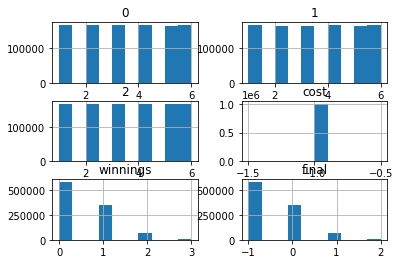

In [98]:
# Chart out a histogram of all the outcomes of those 1,000,000 games

rolls.hist().resize()

# Is this really a fair game of 1/6 + 1/6 + 1/6 odds?
Definitely not. The stats show that you will be losing the majority of the time.  